In [1]:
#######################################################
#勾配法の練習
#######################################################

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import common.gradient as g
import numpy as np
import matplotlib.pylab as plt

#勾配法の関数を実装する。 テキストのP107を参考に
#入力：ｆ・・・関数、　init_x・・・ベクトル、lr・・・学習係数、step_num・・・勾配法で繰り返す回数
def gradient_descent_my(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        x -= lr * g.numerical_gradient(f, x)
        
    return x

実際に試してみる。対象は以下の関数
$$
    y = x_0^2 + x_1^2
$$

In [3]:
#実際に試してみる。
def function2(x):
    return np.sum(x**2)

print(function2(np.array([2,3])))

13


In [4]:
init_x = np.array([-3.0, 4.0])
grad = gradient_descent_my(function2, init_x, lr=0.1)
print(grad)

[-6.11110793e-10  8.14814391e-10]


テキストP108では、(0,0)が最小値ということで解説されているため、
得られた結果は、ほぼ正解ということになる。
ここで試しに、lrを大きくしたり、小さくしたりして実験してみる

In [5]:
#学習率が大きすぎる
init_x = np.array([-3.0, 4.0])
grad = gradient_descent_my(function2, init_x, lr=10)
print(grad)

[-2.58983747e+13 -1.29524862e+12]


テキストが示すように、大きな値に発散してしまっている。
逆に学習率が小さすぎる例を試してみる。

In [6]:
#学習率が大きすぎる
init_x = np.array([-3.0, 4.0])
grad = gradient_descent_my(function2, init_x, lr=1e-10)
print(grad)

[-2.99999994  3.99999992]


テキストが示すように、ほとんど更新が終わらずに関数が終了してしまった。
ここで、matplotlibを使って更新の様子を描画してみる。

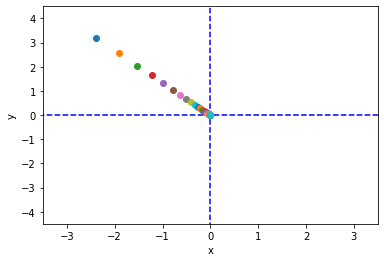

In [8]:
#軸を破線で描画する設定(ch04/gradient_method.pyから引用)
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')

#xとy軸の最大値を設定(ch04/gradient_method.pyから引用)
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)

plt.xlabel("x")
plt.ylabel("y")

init_x = np.array([-3.0, 4.0])
for i in range(100):
    grad_x, grad_y = gradient_descent_my(function2, init_x, lr=0.1, step_num=1)
    plt.plot(grad_x,grad_y,"o")
    init_x = np.array([grad_x, grad_y])
    
plt.show()

結論として勾配法で最小値を求めることができるようになった。